In [24]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Read in the master dataframe
dataframe = pd.read_pickle('master_dataset_2020-05-25_sampled_hourly_fixed.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 15:00:00,22.091944,19.650111,1.189444,1.932778,2.092222,52.192722,1.424349,159.197722,1.421860,99189.348889,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,21.903833,19.097667,1.157778,1.971667,2.184444,52.622278,1.424326,135.293611,1.422013,99140.855556,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.842556,18.681556,1.468889,2.380556,2.606667,53.220000,1.424310,119.157722,1.422116,99111.470556,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.759000,20.940722,1.906667,2.956111,3.228333,53.444944,1.424059,98.585667,1.422117,99124.263889,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.563167,24.689333,2.208333,3.385000,3.670000,53.140333,1.423810,91.635056,1.422015,99155.933889,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.924556,30.432944,5.115000,6.662778,6.872778,73.049333,1.425910,121.291000,1.423404,99705.132778,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,39.951111,30.081556,6.773333,8.543889,8.806111,78.604889,1.425797,136.821444,1.423287,99701.504444,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,37.129333,35.702833,10.958889,14.503889,14.927222,81.051278,1.425383,124.142611,1.423120,99690.339444,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


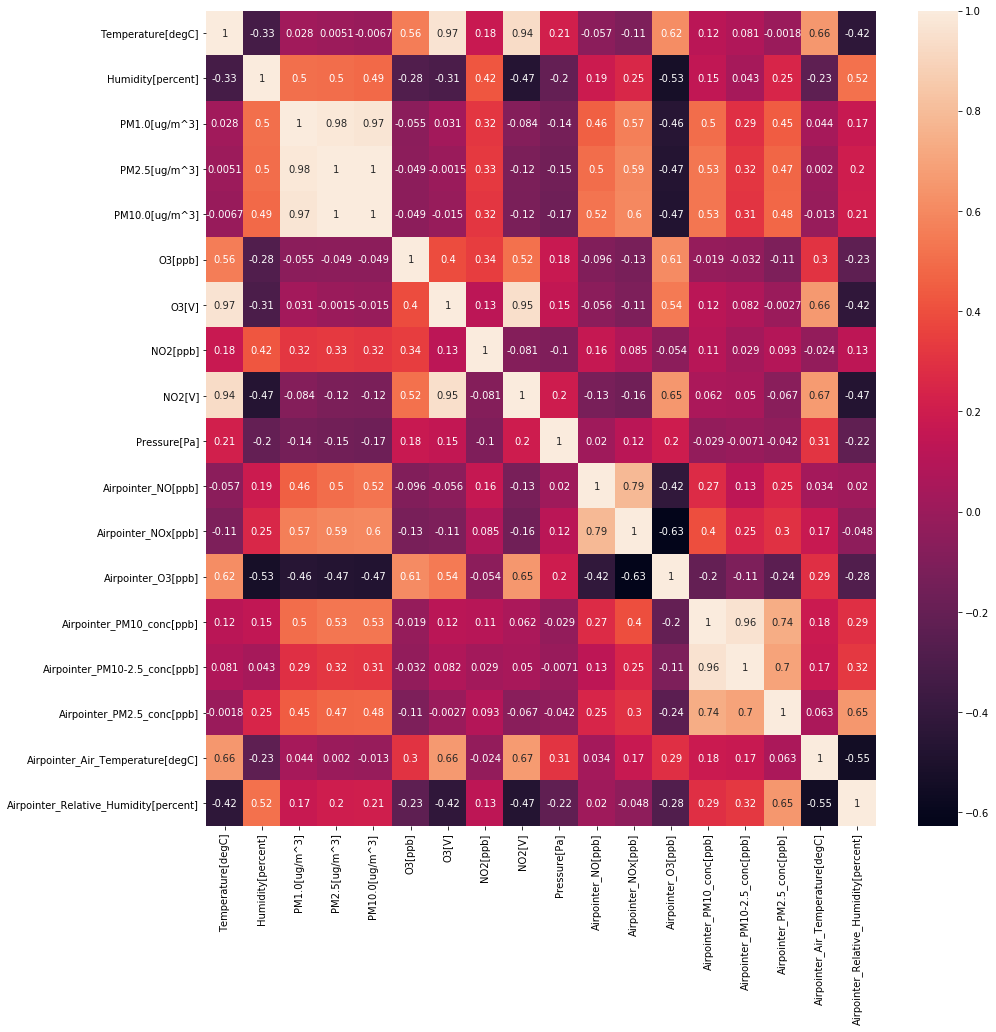

In [25]:
dataframe_new = dataframe.drop(columns=['Airpointer_NO2[ppb]'])
corrMatrix = dataframe_new.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

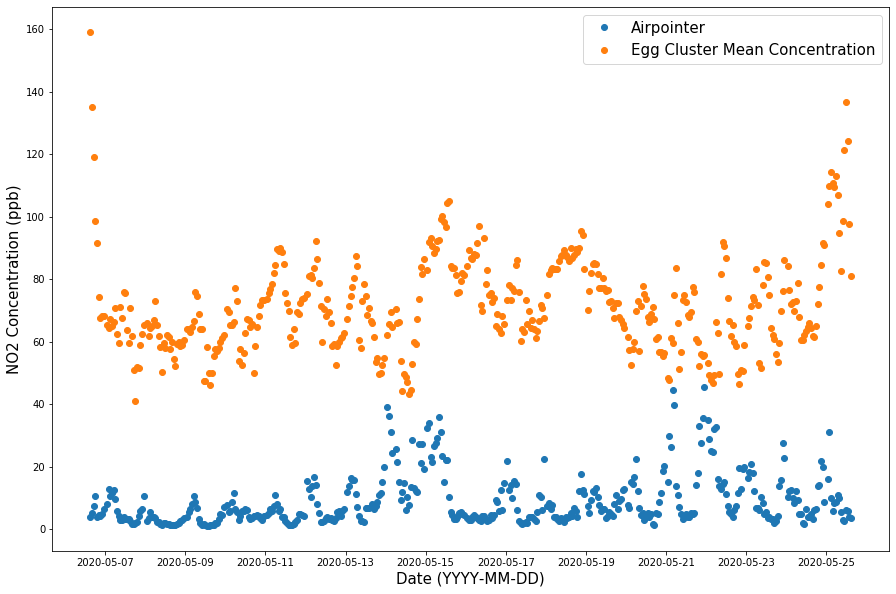

In [26]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), dataframe['NO2[ppb]'], 'o',label="Egg Cluster Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

0.0013051837910997843

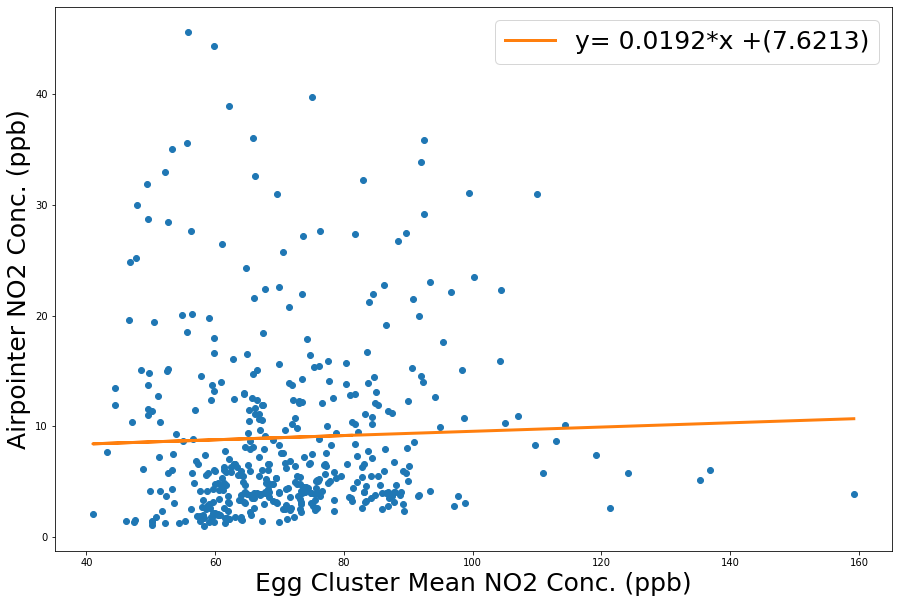

In [27]:
# Calculate a regression line
xValues = dataframe['NO2[ppb]'].to_numpy()
yValues = dataframe['Airpointer_NO2[ppb]'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [28]:
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO[ppb],Airpointer_NO2[ppb],Airpointer_NOx[ppb],Airpointer_O3[ppb],Airpointer_PM10_conc[ppb],Airpointer_PM10-2.5_conc[ppb],Airpointer_PM2.5_conc[ppb],Airpointer_Air_Temperature[degC],Airpointer_Relative_Humidity[percent]
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 15:00:00,22.091944,19.650111,1.189444,1.932778,2.092222,52.192722,1.424349,159.197722,1.421860,99189.348889,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,21.903833,19.097667,1.157778,1.971667,2.184444,52.622278,1.424326,135.293611,1.422013,99140.855556,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.842556,18.681556,1.468889,2.380556,2.606667,53.220000,1.424310,119.157722,1.422116,99111.470556,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.759000,20.940722,1.906667,2.956111,3.228333,53.444944,1.424059,98.585667,1.422117,99124.263889,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.563167,24.689333,2.208333,3.385000,3.670000,53.140333,1.423810,91.635056,1.422015,99155.933889,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.924556,30.432944,5.115000,6.662778,6.872778,73.049333,1.425910,121.291000,1.423404,99705.132778,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,39.951111,30.081556,6.773333,8.543889,8.806111,78.604889,1.425797,136.821444,1.423287,99701.504444,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,37.129333,35.702833,10.958889,14.503889,14.927222,81.051278,1.425383,124.142611,1.423120,99690.339444,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


In [29]:
# -------------------- ALL THE DATASET FEATURES --------------------
# Convert to numpy array
# Seperate the target
# Remove the target from the DATA matrix 
DATA = dataframe.to_numpy()
target = DATA[:,11].reshape(-1,1)
DATA = np.delete(DATA, 11, 1)
# -------------------- ONLY EGG FEATURES --------------------
# Convert to numpy array
# Seperate the target
# Remove the target from the DATA matrix 
DATA_new = dataframe.to_numpy()
target_new = DATA_new[:,11].reshape(-1,1)
DATA_new = np.delete(DATA, slice(11,17,1), 1)

In [30]:
# Split the data into training and test sets
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)
# Simple Linear Regression method
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(elastic_net.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(elastic_net.score(DATA_test, target_test)))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, elastic_net.predict(DATA))))
R2 = metrics.r2_score(target, elastic_net.predict(DATA))
adjusted_R2 = 1 - ((1-R2**2)*(np.size(DATA[:,0],0)-1))/(np.size(DATA[:,0],0) - np.size(DATA[:0],1) - 1)
print('R2: {:0.4f}'.format(R2))
print('adjusted-R2: {:0.4f}'.format(adjusted_R2))
print('Estimator feature strengths: {}'.format(elastic_net.coef_))

Training set score: 0.998592
Test set score: 0.998453
MAE: 0.1832
R2: 0.9986
adjusted-R2: 0.9970
Estimator feature strengths: [-3.96310934e-03 -3.85595118e-03 -1.22773609e-01  1.82213187e-01
 -8.06488826e-02 -2.68891739e-03 -0.00000000e+00 -8.21933464e-05
 -0.00000000e+00 -2.35001270e-05 -9.57019425e-01  9.87469297e-01
  6.69258705e-04 -6.63615437e-03  9.31617278e-03 -1.39537887e-02
  2.84414089e-04  3.53948675e-03]


0.9985686896588342

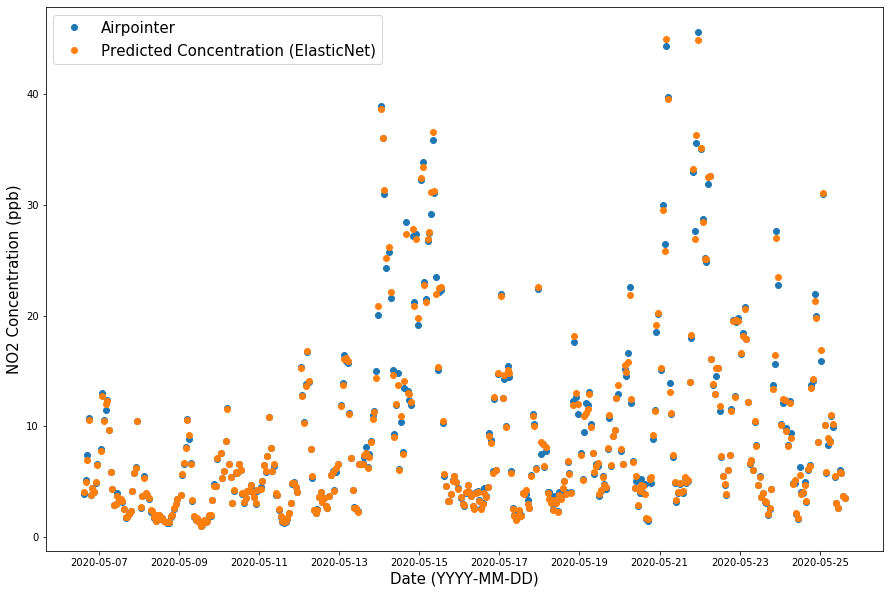

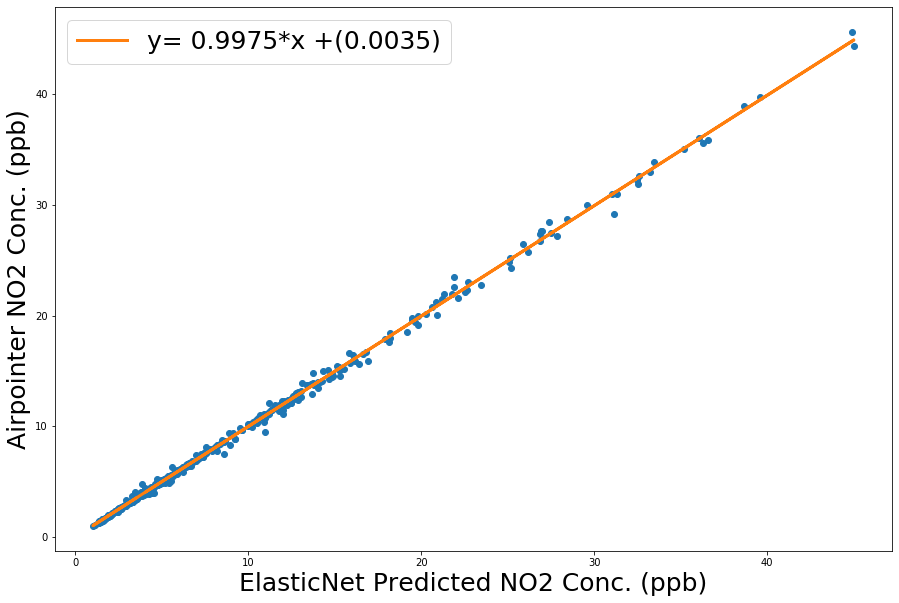

In [32]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), elastic_net.predict(DATA), 'o',label="Predicted Concentration (ElasticNet)")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(DATA).reshape(-1,1)
yValues = target
linear_regression = LinearRegression().fit(xValues, yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0][0], linear_regression.intercept_[0]),
         linewidth=3)
plt.xlabel('ElasticNet Predicted NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [49]:
egg_1 = pd.read_pickle('RAW_DATA_HOURLY/Egg#1_merged_2020-05-25_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_07Jun2020_hourly.pkl')
egg_1['target'] = airpointer['NO2']
egg_1 = egg_1.drop(egg_1[egg_1['target'] < -1].index)
egg_1 = egg_1.iloc[3:]
egg_1

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],target
Timestamp,,,,,,,,,,,
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,5.137333
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,7.393667
2020-05-06 18:00:00,18.645333,21.028000,2.131667,3.108333,3.378333,60.565167,1.423228,36.461000,1.423820,99122.906667,10.763833
2020-05-06 19:00:00,15.233333,25.081167,2.056667,3.140000,3.445000,59.701167,1.422927,47.741167,1.423570,99152.673333,3.808167
2020-05-06 20:00:00,13.897000,23.854167,2.478333,3.111667,3.216667,55.333167,1.422890,38.522333,1.423570,99211.770000,4.448667
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.214833,31.378333,5.290000,6.758333,6.945000,104.149333,1.425032,47.685500,1.425057,99704.113333,2.609533
2020-05-25 12:00:00,39.422833,30.894000,5.721667,7.266667,7.496667,111.523167,1.424905,60.157167,1.424978,99702.663333,6.032083
2020-05-25 13:00:00,36.963833,36.078500,11.388333,14.788333,15.198333,109.410500,1.424517,61.609500,1.424756,99692.300000,5.811367


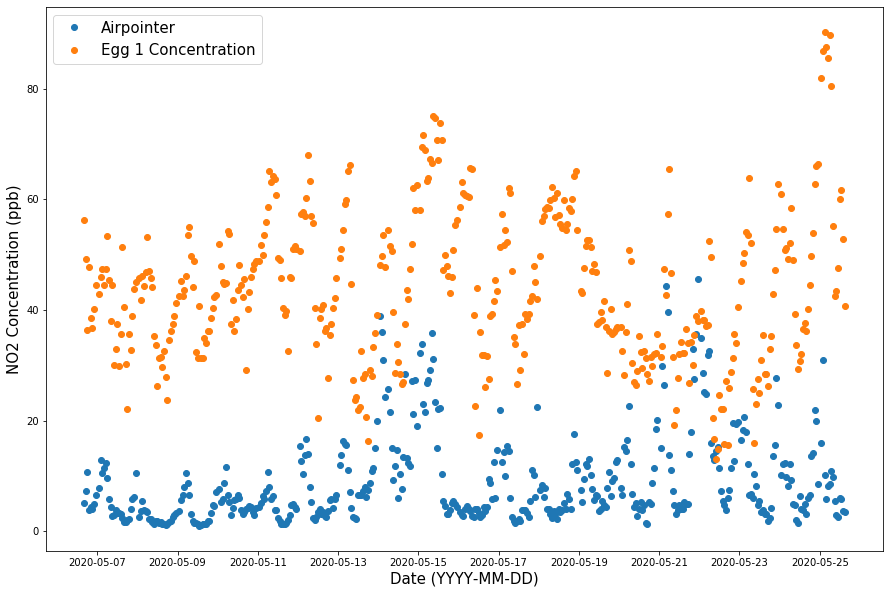

In [48]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_1.index.to_series(), egg_1['target'], 'o', label='Airpointer')
plt.plot(egg_1.index.to_series(), egg_1['NO2[ppb]'], 'o',label="Egg 1 Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

0.07628042185903705

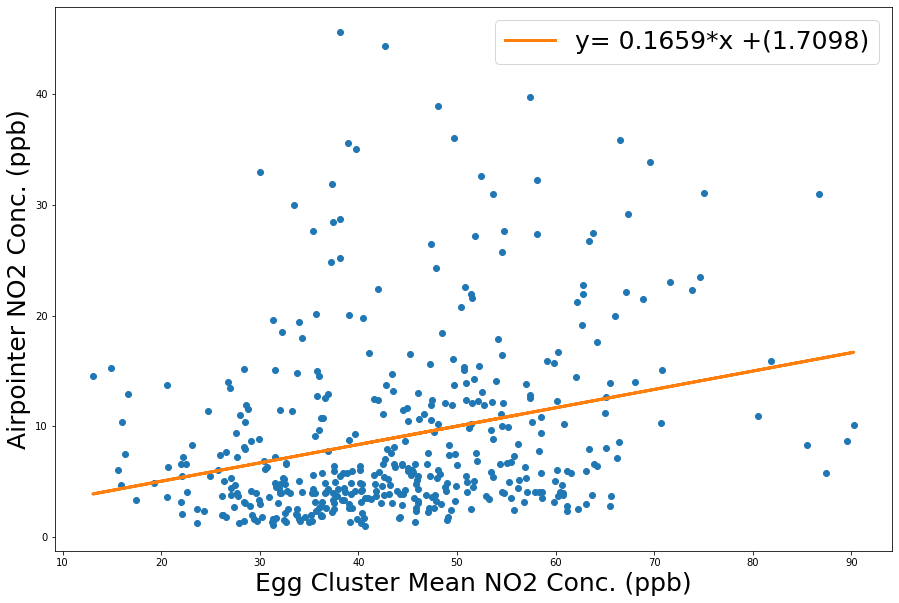

In [50]:
# Calculate a regression line
xValues = egg_1['NO2[ppb]'].to_numpy()
yValues = egg_1['target'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [62]:
egg_1 = pd.read_pickle('RAW_DATA_HOURLY/Egg#1_merged_2020-05-25_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_07Jun2020_hourly.pkl')
egg_1 = pd.concat((egg_1, airpointer), axis=1)
egg_1 = egg_1.dropna()
# Remove target values less than -1
egg_1 = egg_1.drop(egg_1[egg_1['NO2'] < -1].index)
# Drop the first 3 outliers
egg_1 = egg_1.iloc[3:]
egg_1.to_pickle('Egg#1.pkl')
egg_1

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.645333,21.028000,2.131667,3.108333,3.378333,60.565167,1.423228,36.461000,1.423820,99122.906667,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.233333,25.081167,2.056667,3.140000,3.445000,59.701167,1.422927,47.741167,1.423570,99152.673333,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,13.897000,23.854167,2.478333,3.111667,3.216667,55.333167,1.422890,38.522333,1.423570,99211.770000,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.214833,31.378333,5.290000,6.758333,6.945000,104.149333,1.425032,47.685500,1.425057,99704.113333,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,39.422833,30.894000,5.721667,7.266667,7.496667,111.523167,1.424905,60.157167,1.424978,99702.663333,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,36.963833,36.078500,11.388333,14.788333,15.198333,109.410500,1.424517,61.609500,1.424756,99692.300000,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


In [66]:
egg_2 = pd.read_pickle('RAW_DATA_HOURLY/Egg#2_merged_2020-05-25_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_07Jun2020_hourly.pkl')
egg_2 = pd.concat((egg_2, airpointer), axis=1)
egg_2 = egg_2.dropna()
# Remove target values less than -1
egg_2 = egg_2.drop(egg_2[egg_2['NO2'] < -1].index)
# Drop the first 3 outliers
egg_2 = egg_2.iloc[3:]
egg_2.to_pickle('Egg#2.pkl')
egg_2

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,20.953000,19.848500,1.176667,2.225000,2.566667,49.969500,1.426642,159.897500,1.416693,99179.105000,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,20.857333,19.506000,1.535000,2.705000,3.095000,49.267167,1.426650,147.016667,1.416786,99149.590000,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.225500,21.406000,1.880000,3.160000,3.610000,51.485667,1.426424,126.761167,1.416787,99159.563333,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.302833,24.939000,2.451667,3.908333,4.310000,53.274667,1.426185,116.474000,1.416691,99189.203333,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,13.840667,23.943000,0.711667,1.368333,1.595000,50.676833,1.426138,97.668667,1.416746,99244.840000,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,40.328500,29.738167,5.068333,6.813333,7.096667,52.378500,1.428412,136.823167,1.418727,99727.281667,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,40.050000,29.867000,6.316667,8.331667,8.731667,56.984667,1.428279,156.928667,1.418531,99722.440000,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,36.893167,35.986000,11.150000,15.121667,15.691667,63.011667,1.427813,146.502500,1.418251,99711.218333,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


In [70]:
egg = pd.read_pickle('RAW_DATA_HOURLY/Egg#4_merged_2020-05-25_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_07Jun2020_hourly.pkl')
egg = pd.concat((egg, airpointer), axis=1)
egg = egg.dropna()
# Remove target values less than -1
egg = egg.drop(egg[egg['NO2'] < -1].index)
# Drop the first 3 outliers
egg = egg.iloc[3:]
egg.to_pickle('Egg#4.pkl')
egg

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,22.319833,18.850500,1.110000,1.770000,1.896667,46.779333,1.422770,189.641833,1.425485,99105.393333,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,22.198833,18.444833,1.400000,2.188333,2.283333,47.520667,1.422746,161.216000,1.425648,99076.631667,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,19.406167,20.388167,1.708333,2.600000,2.696667,48.284000,1.422525,132.534833,1.425743,99090.321667,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,16.153333,24.047833,2.116667,3.106667,3.255000,46.445167,1.422319,110.690000,1.425784,99125.925000,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,14.565833,23.106500,0.821667,1.178333,1.246667,43.417667,1.422257,87.185667,1.425876,99185.425000,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,40.230333,30.182333,4.986667,6.416667,6.576667,62.620167,1.424285,179.364333,1.426430,99684.003333,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,40.380500,29.483667,8.281667,10.033333,10.190000,67.306833,1.424207,193.378500,1.426352,99679.410000,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,37.531000,35.044000,10.338333,13.601667,13.891667,70.731667,1.423820,164.315833,1.426354,99667.500000,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


In [84]:
egg_1 = pd.read_pickle('RAW_DATA_HOURLY/Egg#1_merged_2020-05-25_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_07Jun2020_hourly.pkl')
egg_1 = pd.concat((egg_1, airpointer), axis=1)
egg_1 = egg_1.dropna()
# Remove target values less than -1
egg_1 = egg_1.drop(egg_1[egg_1['NO2'] < -1].index)
# Drop the first 3 outliers
egg_1 = egg_1.iloc[2:]
egg_1.to_pickle('Egg#1_v2.pkl')

egg_2 = pd.read_pickle('RAW_DATA_HOURLY/Egg#2_merged_2020-05-25_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_07Jun2020_hourly.pkl')
egg_2 = pd.concat((egg_2, airpointer), axis=1)
egg_2 = egg_2.dropna()
# Remove target values less than -1
egg_2 = egg_2.drop(egg_2[egg_2['NO2'] < -1].index)
# Drop the first 3 outliers
egg_2 = egg_2.iloc[2:]
egg_2.to_pickle('Egg#2_v2.pkl')


egg = pd.read_pickle('RAW_DATA_HOURLY/Egg#4_merged_2020-05-25_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_07Jun2020_hourly.pkl')
egg = pd.concat((egg, airpointer), axis=1)
egg = egg.dropna()
# Remove target values less than -1
egg = egg.drop(egg[egg['NO2'] < -1].index)
# Drop the first 3 outliers
egg = egg.iloc[2:]
egg.to_pickle('Egg#4_v2.pkl')


In [85]:
egg_1 = pd.read_pickle('Egg#1_v2.pkl')
egg_2 = pd.read_pickle('Egg#2_v2.pkl')
egg_4 = pd.read_pickle('Egg#4_v2.pkl')

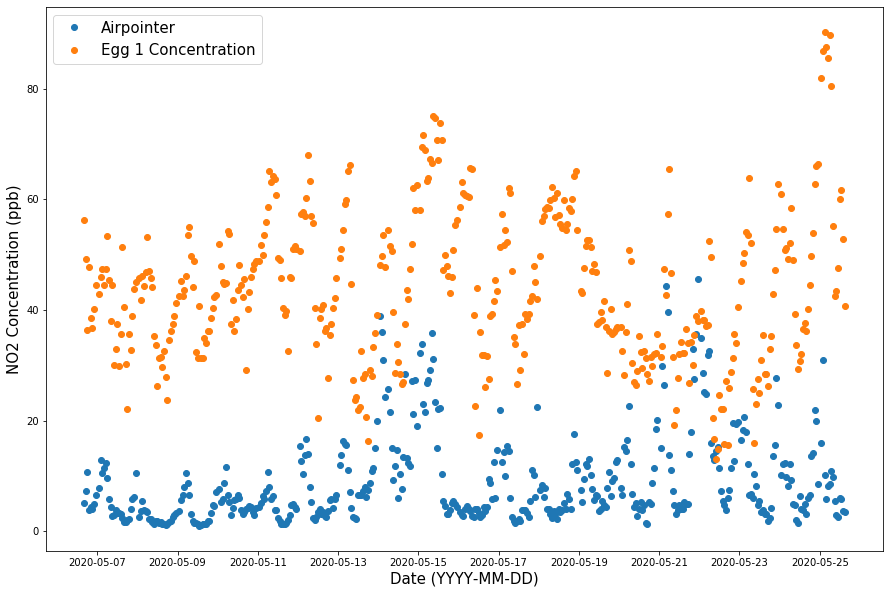

In [73]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_1.index.to_series(), egg_1['NO2'], 'o', label='Airpointer')
plt.plot(egg_1.index.to_series(), egg_1['NO2[ppb]'], 'o',label="Egg 1 Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

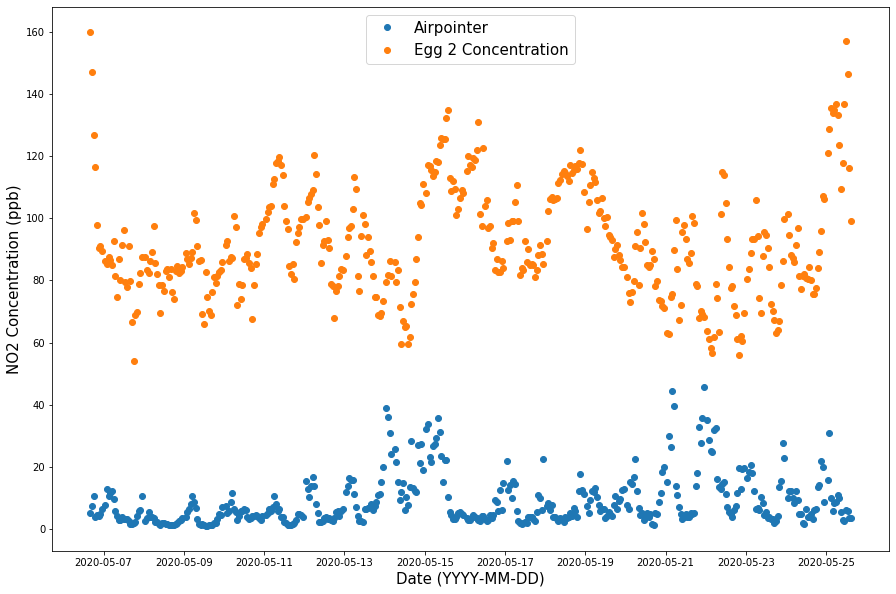

In [74]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_2.index.to_series(), egg_2['NO2'], 'o', label='Airpointer')
plt.plot(egg_2.index.to_series(), egg_2['NO2[ppb]'], 'o',label="Egg 2 Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

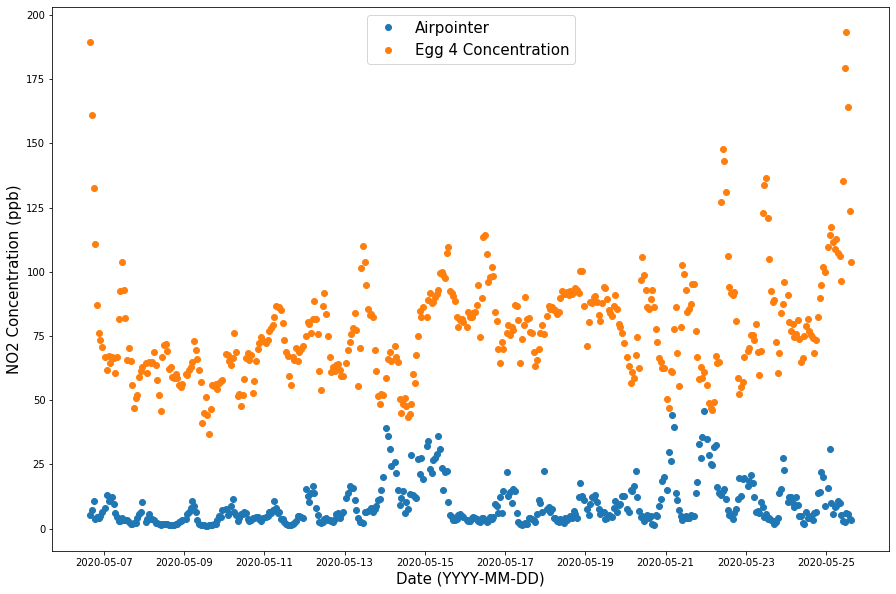

In [76]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_4.index.to_series(), egg_4['NO2'], 'o', label='Airpointer')
plt.plot(egg_4.index.to_series(), egg_4['NO2[ppb]'], 'o',label="Egg 4 Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [86]:
egg_cluster = pd.concat((egg_1, egg_2, egg_4))
egg_cluster = egg_cluster.groupby(egg_cluster.index).mean()
egg_cluster

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 15:00:00,22.091944,19.650111,1.189444,1.932778,2.092222,52.192722,1.424349,159.197722,1.421860,99189.348889,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,21.903833,19.097667,1.157778,1.971667,2.184444,52.622278,1.424326,135.293611,1.422013,99140.855556,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,21.842556,18.681556,1.468889,2.380556,2.606667,53.220000,1.424310,119.157722,1.422116,99111.470556,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.759000,20.940722,1.906667,2.956111,3.228333,53.444944,1.424059,98.585667,1.422117,99124.263889,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.563167,24.689333,2.208333,3.385000,3.670000,53.140333,1.423810,91.635056,1.422015,99155.933889,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,39.924556,30.432944,5.115000,6.662778,6.872778,73.049333,1.425910,121.291000,1.423404,99705.132778,0.365917,2.609533,2.975500,55.903200,19.268467,12.141783,7.127267,996.547950,30.645433
2020-05-25 12:00:00,39.951111,30.081556,6.773333,8.543889,8.806111,78.604889,1.425797,136.821444,1.423287,99701.504444,0.603183,6.032083,6.635250,56.402150,25.994967,14.871600,11.122967,996.351517,28.949983
2020-05-25 13:00:00,37.129333,35.702833,10.958889,14.503889,14.927222,81.051278,1.425383,124.142611,1.423120,99690.339444,0.628783,5.811367,6.428683,63.794417,30.028817,18.580050,11.447000,996.178783,28.876100


In [80]:
egg_1.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.645333,21.028000,2.131667,3.108333,3.378333,60.565167,1.423228,36.461000,1.423820,99122.906667,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.233333,25.081167,2.056667,3.140000,3.445000,59.701167,1.422927,47.741167,1.423570,99152.673333,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,13.897000,23.854167,2.478333,3.111667,3.216667,55.333167,1.422890,38.522333,1.423570,99211.770000,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833


In [81]:
egg_2.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,20.953000,19.8485,1.176667,2.225000,2.566667,49.969500,1.426642,159.897500,1.416693,99179.105000,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,20.857333,19.5060,1.535000,2.705000,3.095000,49.267167,1.426650,147.016667,1.416786,99149.590000,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,18.225500,21.4060,1.880000,3.160000,3.610000,51.485667,1.426424,126.761167,1.416787,99159.563333,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,15.302833,24.9390,2.451667,3.908333,4.310000,53.274667,1.426185,116.474000,1.416691,99189.203333,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,13.840667,23.9430,0.711667,1.368333,1.595000,50.676833,1.426138,97.668667,1.416746,99244.840000,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833


In [82]:
egg_4.head()

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,
2020-05-06 16:00:00,22.319833,18.850500,1.110000,1.770000,1.896667,46.779333,1.422770,189.641833,1.425485,99105.393333,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,22.198833,18.444833,1.400000,2.188333,2.283333,47.520667,1.422746,161.216000,1.425648,99076.631667,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,19.406167,20.388167,1.708333,2.600000,2.696667,48.284000,1.422525,132.534833,1.425743,99090.321667,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,16.153333,24.047833,2.116667,3.106667,3.255000,46.445167,1.422319,110.690000,1.425784,99125.925000,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,14.565833,23.106500,0.821667,1.178333,1.246667,43.417667,1.422257,87.185667,1.425876,99185.425000,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833


In [87]:
egg_cluster.to_pickle('EGG_CLUSTER_v2.pkl')